# A simple Neural Network model written using TensorFlow that trains on the Titanic dataset.
# By entering the details of a passenger, the model predicts whether they survived or not.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization
#from tensorflow.keras.layers.experimental import preprocessing
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import pandas as pd

In [2]:
train_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
test_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file = tf.keras.utils.get_file("train.csv", train_URL)
test_file = tf.keras.utils.get_file("eval.csv", test_URL)

In [3]:
!head {train_file}

'head' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
train = pd.read_csv(train_file)
train 

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [5]:
test = pd.read_csv(test_file)
test

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y
...,...,...,...,...,...,...,...,...,...,...
259,1,female,25.0,0,1,26.0000,Second,unknown,Southampton,n
260,0,male,33.0,0,0,7.8958,Third,unknown,Southampton,y
261,0,female,39.0,0,5,29.1250,Third,unknown,Queenstown,n
262,0,male,27.0,0,0,13.0000,Second,unknown,Southampton,y


In [6]:
test, val = train_test_split(test, test_size=0.5)

In [7]:
print(len(train), "trains", len(test), "tests", len(val), "validations")

627 trains 132 tests 132 validations


<Axes: >

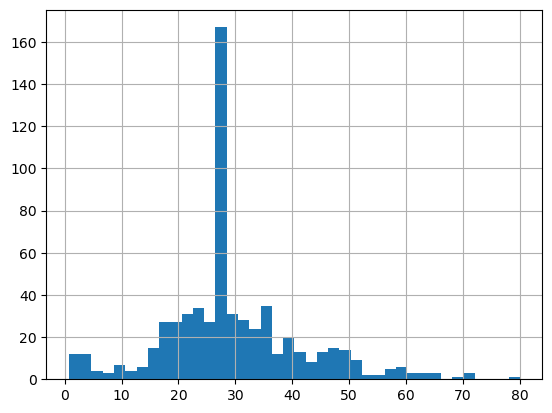

In [8]:
train.age.hist(bins=40)

<Axes: >

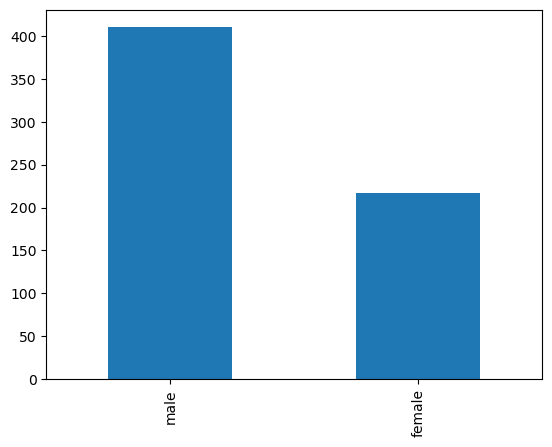

In [9]:
train.sex.value_counts().plot(kind='bar')

<Axes: >

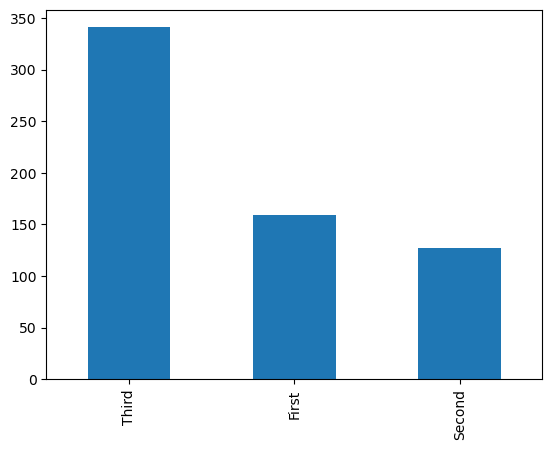

In [10]:
train['class'].value_counts().plot(kind='bar')

<Axes: xlabel='sex'>

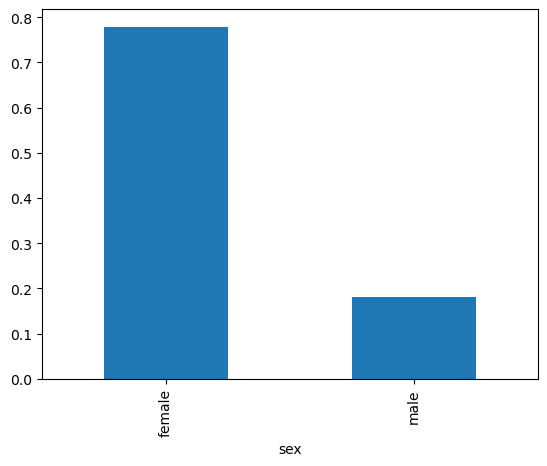

In [11]:
train.groupby('sex').survived.mean().plot(kind='bar')

In [12]:
def df_to_dataset(df, shuffle=True, batch_size=3):
    
    # Creating a copy of the dataframe.
    df_copy = df.copy()
    
    # Popping the target variables and keeping them as labels.
    labels = df_copy.pop('survived')
    
    # Creating a tf.data dataset object from the Pandas dataframe.
    # Since the "from_tensor_slices" gets only one parameter,
    # we pass the dataframe and labels together as a tuple.
    ds = tf.data.Dataset.from_tensor_slices((dict(df_copy), labels))
    
    # Shuffling the dataset.
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df_copy))
        
    # Using the batching method, processing a batch_size at a time.
    ds = ds.batch(batch_size)
    
    # Prefetching for optimization of the training process.
    ds = ds.prefetch(batch_size)
    
    return ds

In [13]:
train_ds = df_to_dataset(train)
train_ds

<_PrefetchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'n_siblings_spouses': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'deck': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'embark_town': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [14]:
[(train_features, label_batch)] = train_ds.take(1)
label_batch

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 0, 0], dtype=int64)>

In [15]:
train_features.keys()

dict_keys(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone'])

In [16]:
print(train_features['age'])

tf.Tensor([19. 28.  2.], shape=(3,), dtype=float64)


In [17]:
print(label_batch)

tf.Tensor([1 0 0], shape=(3,), dtype=int64)


## Feature Engineering

In [18]:
train.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [19]:
# Defining a function that returns a layer which applies feature-wise normalization to numerical features.
def get_normalization_layer(feature, dataset):
    
    # Creating a normalization layer for the feature.
    normalized = Normalization(axis=None)
    
    # Preparing a dataset that yields the feature only.
    ds_feature = dataset.map(lambda x, y: x[feature])
    
    # Preprocessing/adapting.
    normalized.adapt(ds_feature)
    
    return normalized

In [20]:
ages = train_features['age']
ages

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([19., 28.,  2.])>

In [21]:
ages_normalized = get_normalization_layer('age', train_ds)
ages_normalized(ages)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.85037947, -0.13048515, -2.2101798 ], dtype=float32)>

In [22]:
# Defining a function that returns a layer which performs one-hot-encoding of the string-type features.
def get_one_hot_encoding(feature, ds, dtype, max_tokens=None):
    
    # Translating the string features into integer output using StingLookup() function
    if dtype == 'string':
        index = layers.StringLookup(max_tokens=max_tokens)
        print("index: ", index)
    # Mapping integer features to contiguous ranges.
    else:
        index = layers.IntegerLookup(max_tokens=max_tokens)
        
    # Preparing a dataset that only yields our target feature.
    ds_feature = ds.map(lambda x, y: x[feature])
    
    # Learning the set of possible values and assigning them a fixed integer index.
    index.adapt(ds_feature)
    
    # Category encoding for the integer indices.
    encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())
    
    # Apply one-hot-encoding to the indices and return the feature.
    return lambda feature: encoder(index(feature))

In [23]:
index = layers.StringLookup(max_tokens=None)
ds_feature = train_ds.map(lambda x, y: x['embark_town'])
index.adapt(ds_feature)

print(index.get_vocabulary())
print(index.vocabulary_size())

['[UNK]', 'Southampton', 'Cherbourg', 'Queenstown', 'unknown']
5


In [24]:
categorical_layer = get_one_hot_encoding('embark_town', train_ds, 'string')
categorical_layer(train_features['embark_town'])

index:  <keras.src.layers.preprocessing.string_lookup.StringLookup object at 0x000002E6CE2DCD90>


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 0., 1., 0.], dtype=float32)>

In [25]:
train_features['embark_town']

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Southampton', b'Southampton', b'Queenstown'], dtype=object)>

## Creating a Pipeline

In [26]:
batch_size = 64
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

all_inputs = []
encoded_features = []

numeric_columns = ['age', 'n_siblings_spouses', 'parch', 'fare']

for column_name in numeric_columns:
    numeric_column = tf.keras.Input(shape=(1,), name=column_name)
    normalization_layer = get_normalization_layer(column_name, train_ds)
    encoded_numeric_column = normalization_layer(numeric_column)
    all_inputs.append(numeric_column)
    encoded_features.append(encoded_numeric_column)

categorical_columns = ['sex', 'class', 'embark_town', 'deck', 'alone']

for column_name in categorical_columns:
    categorical_column = tf.keras.Input(shape=(1,), name=column_name, dtype='string')
    encoding_layer = get_one_hot_encoding(column_name, train_ds, dtype='string', max_tokens=5)
    encoded_categorical_column = encoding_layer(categorical_column)
    all_inputs.append(categorical_column)
    encoded_features.append(encoded_categorical_column)

index:  <keras.src.layers.preprocessing.string_lookup.StringLookup object at 0x000002E6CF4EEB90>
index:  <keras.src.layers.preprocessing.string_lookup.StringLookup object at 0x000002E6CF52B1C0>
index:  <keras.src.layers.preprocessing.string_lookup.StringLookup object at 0x000002E6CF5566E0>
index:  <keras.src.layers.preprocessing.string_lookup.StringLookup object at 0x000002E6CF589C00>
index:  <keras.src.layers.preprocessing.string_lookup.StringLookup object at 0x000002E6CF58ADA0>


In [27]:
all_inputs

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>]

In [28]:
encoded_features

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_1')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_2')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_3')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_4')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_1')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'category_encoding_2')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'category_encoding_3')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'category_encoding_4')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_5')>]

## Building the Model

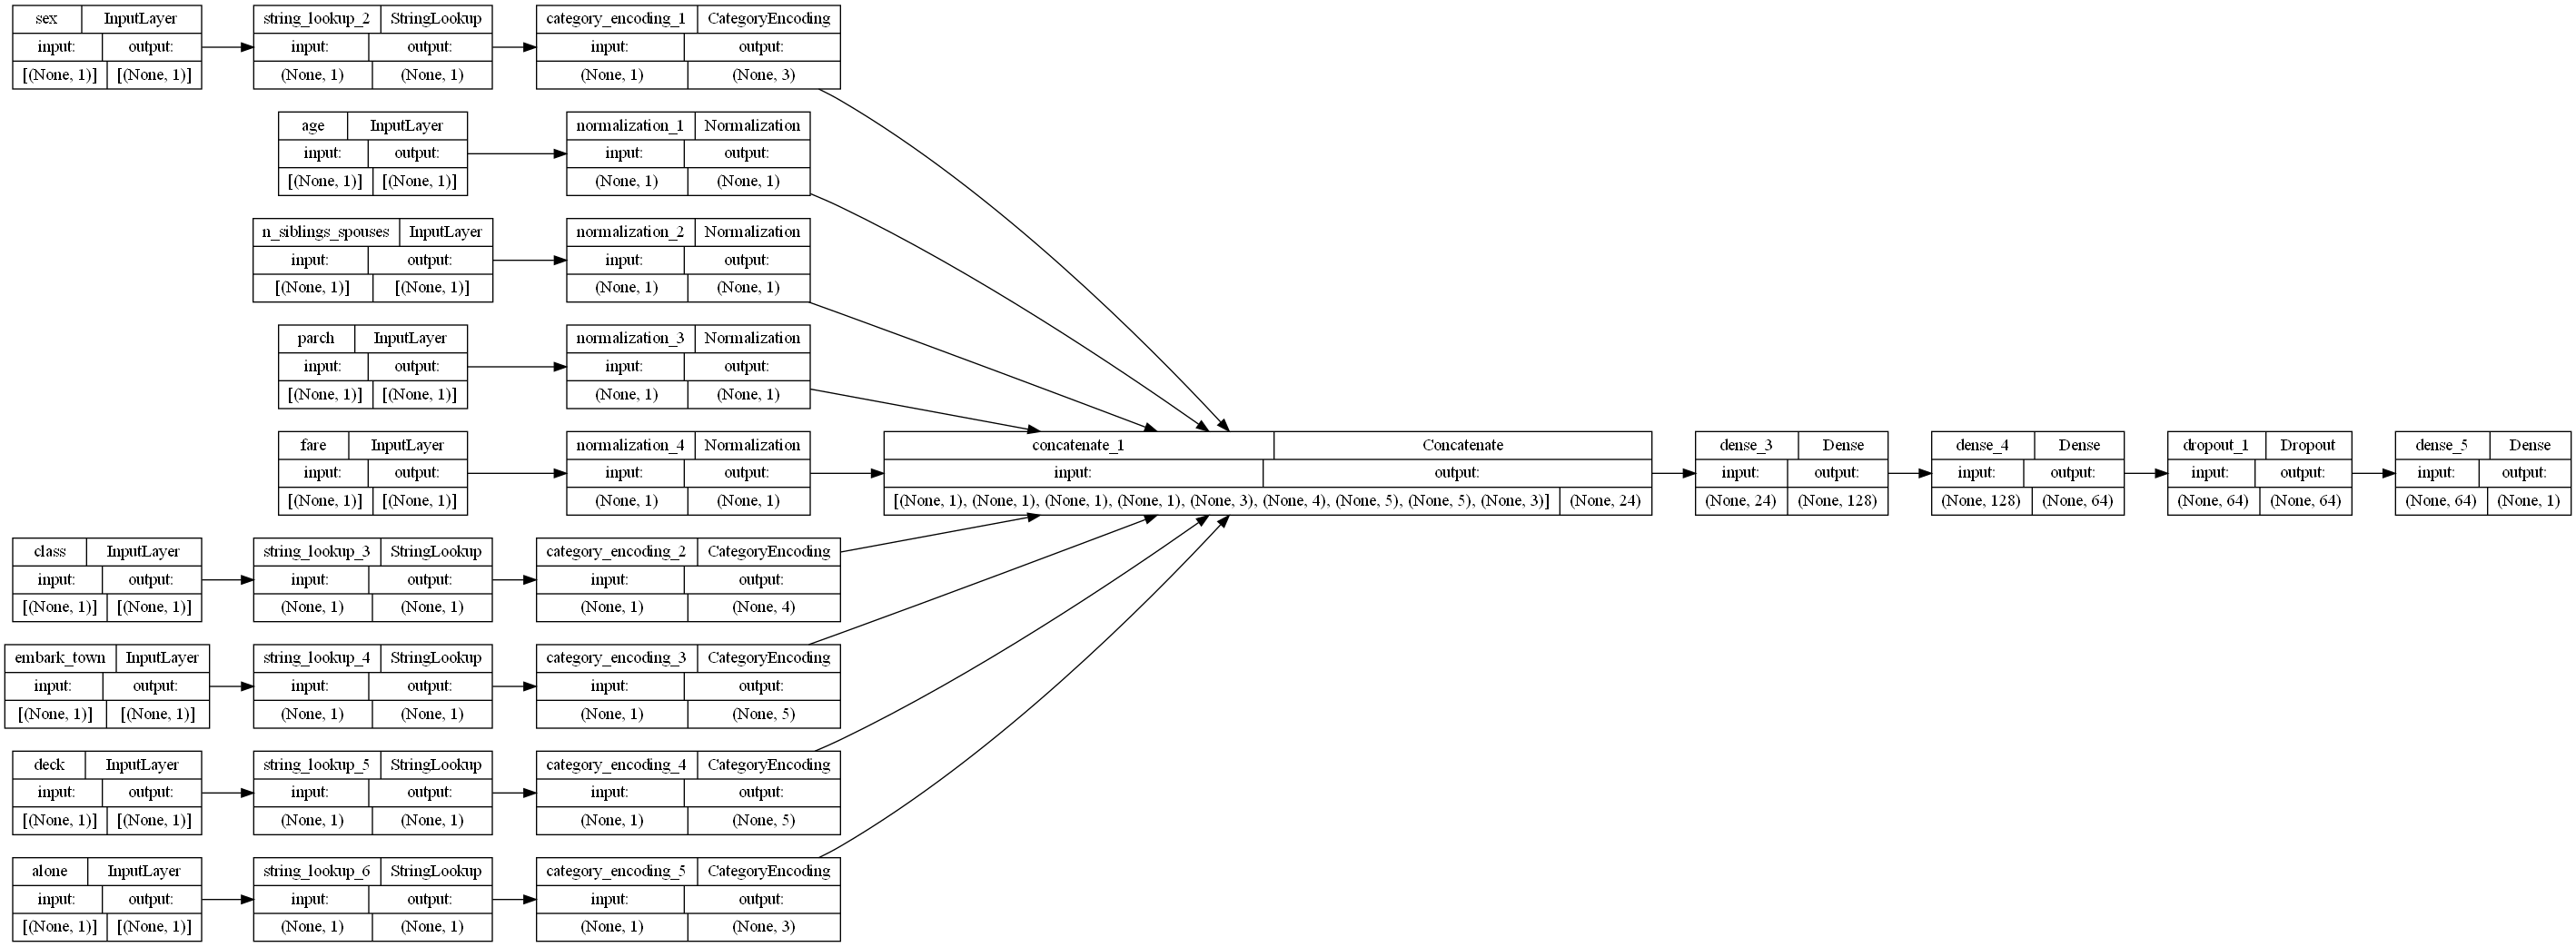

In [30]:
all_features = tf.keras.layers.concatenate(encoded_features)

x = tf.keras.layers.Dense(128, activation='relu')(all_features)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

tf.keras.utils.plot_model(model, show_shapes=True, rankdir='LR')

In [31]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 32ms/step - loss: 0.6464 - accuracy: 0.6077 - val_loss: 0.6039 - val_accuracy: 0.5909
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.6364 - val_loss: 0.5485 - val_accuracy: 0.6667
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.6986 - val_loss: 0.5012 - val_accuracy: 0.7197
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.7783 - val_loss: 0.4743 - val_accuracy: 0.7576
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.4301 - accuracy: 0.8134 - val_loss: 0.4596 - val_accuracy: 0.7727
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8262 - val_loss: 0.4520 - val_accuracy: 0.7879
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8278 - val_loss: 0.4478 - val_accuracy: 0.8030
Epoch 8/10
10/10 [=

In [32]:
loss, accuracy = model.evaluate(test_ds)
accuracy

3/3 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.8106


0.810606062412262

In [33]:
model.save('Titanic_classifier')

INFO:tensorflow:Assets written to: Titanic_classifier\assets


INFO:tensorflow:Assets written to: Titanic_classifier\assets
